### Introduction
Consulting firms often support retail, e-commerce, and manufacturing companies in refining their pricing strategies to maximize both revenue and profitability. This project focuses on leveraging data analysis to optimize pricing by examining key factors such as competitor pricing, demand elasticity, promotional impact, and seasonal trends.

Price optimization is a data-driven strategy that involves collecting and analyzing information on sales performance, customer behavior, market demand, costs, and competitor actions. By applying statistical modeling and optimization algorithms, businesses can forecast demand, evaluate price sensitivity, and identify ideal price points for different customer segments. Ultimately, this helps enhance market positioning, boost profitability, and maintain a competitive edge.


### Importing the data

In [42]:
import pandas as pd
pricing_data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/SELF IMPROVEMENT CONTENT/PYTHON/Competition_Data.csv")
print(pricing_data.head())
 

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [43]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


 ### 1.Comparing the price distribution with the competition:

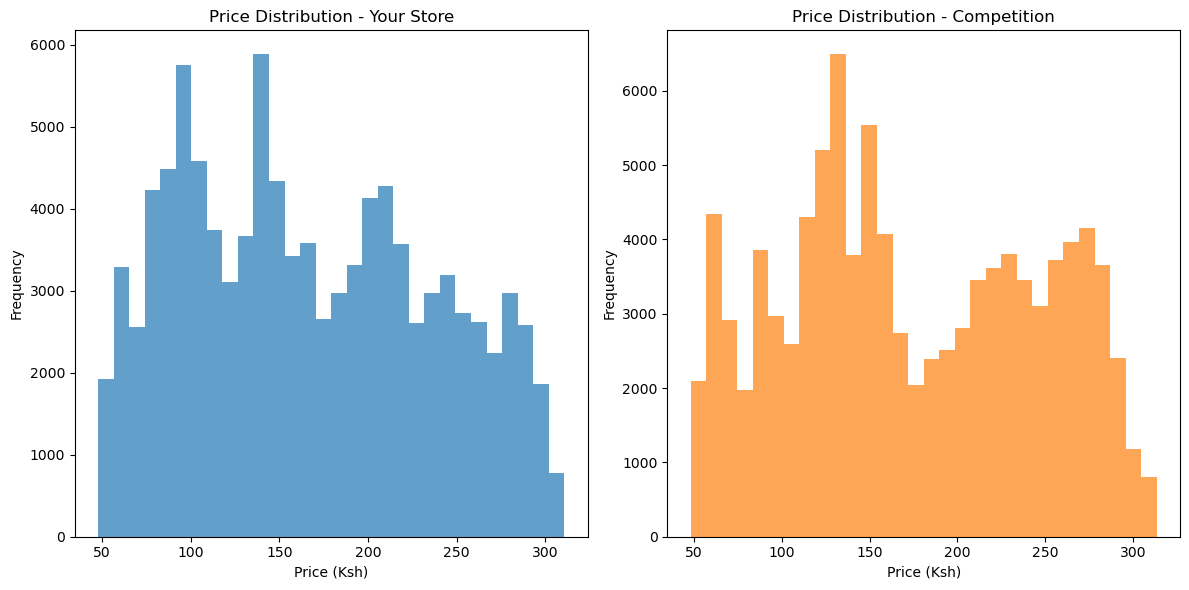

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, color= '#1f77b4',label='Your Store')
plt.xlabel('Price (Ksh)')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=0.7, color='#ff7f0e', label='Competition')
plt.xlabel('Price (Ksh)')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()


#### Insights from comparing the price distribution with the competition:
The data reveals that competitor prices tend to cluster at the higher end, particularly around the 100–150 and 200–250 ranges, suggesting a focus on premium pricing. In contrast, our store’s prices are more evenly spread across the 50–300 range, with a notable concentration around 100–150, indicating a more balanced pricing strategy that caters to a broader customer base.

### 2. Comparing the relationship between price and sales

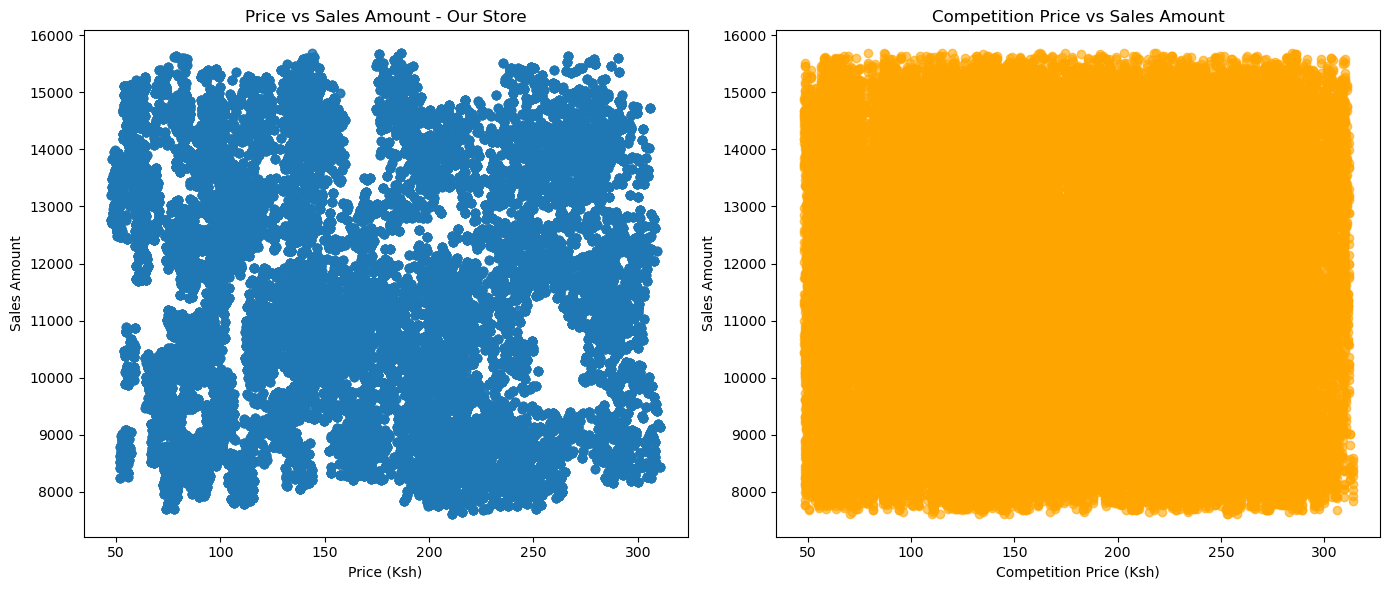

In [45]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.6, label='Your Store')
plt.xlabel('Price (Ksh)')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price (Ksh)')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

#### Insights from Comparing the relationship between price and sales
The scatter plots compare price and sales for our store (left) and the competition (right). In our store, sales amounts are spread out across different prices, showing no clear pattern. For the competition, sales are more tightly grouped and consistently higher across price points. This suggests they may have a stronger pricing strategy that leads to more steady sales.

### 3. comparing the price changes over time

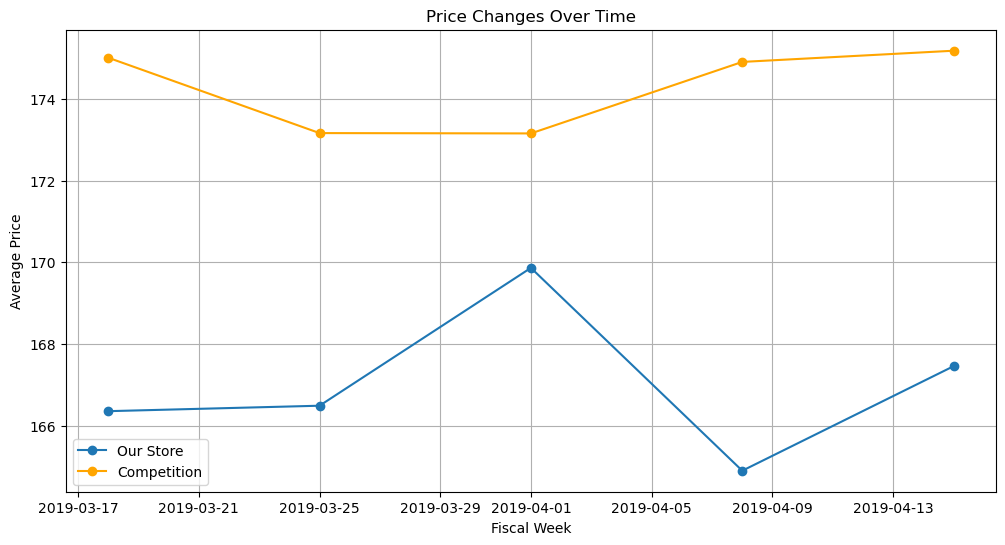

In [46]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()


#### Insights from comparing the price changes over time
The competition keeps their prices consistently above 170, with a steady upward trend. Our store starts around 166, goes up a bit, then drops before rising again. This shows that the competition has a more stable pricing approach, while our store’s prices change more. Their steady pricing might be helping them achieve better and more consistent sales.

### 4. Analyzing how changes in prices affect the change in quantity sold

Ed = % change in quantity demanded / % change in price

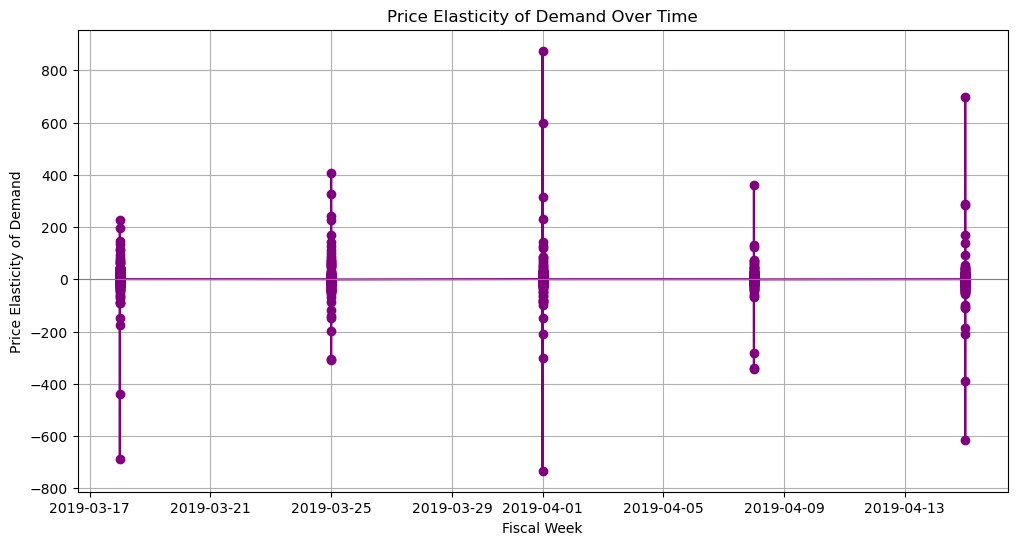

In [47]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']
pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

#### Insights from Analyzing how changes in prices affect the change in quantity sold
The graph shows how price elasticity of demand changes over time. It shows a lot of fluctuation, with elasticity values swinging from highly negative to highly positive. This means the response to price changes varies each week. In some weeks, demand increased with higher prices, while in others, demand dropped sharply. The wide range of elasticity values suggests that factors like promotions, seasonality, or market conditions might be affecting demand more than just price changes.

### 5. calculating and comparing the total sales amounts for our store and the competition:

In [48]:
total_sales_your_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

total_qty_your_store = pricing_data['Item_Quantity'].sum()
total_qty_competition = pricing_data['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})

summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


#### Insights from alculating and comparing the total sales amounts for our store and the competition:
Our store’s total sales are 114,100,500, while the competition’s sales are 696,209,700 (assuming equal quantities sold). This shows that the competition generates significantly more revenue, suggesting their pricing strategy is more effective.

### 6. Analyzing how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms our store:

In [49]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


#### Insights from identifying if there are specific price ranges where the competition outperforms our store:
*0-50 Bracket: The competition has significantly higher sales in this bracket.

*51-100 Bracket: The competition outperforms our store by a wide margin.

*101-150 Bracket: The competition’s sales are much higher than our store’s sales.

*151-200 Bracket: The competition again has significantly higher sales.

*201-250 Bracket: The competition’s sales are nearly double those of our store.

*251-300 Bracket: The competition has higher sales, but the gap is smaller compared to other brackets.

*301-350 Bracket: The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.

### 7. Price Optimization with Dynamic Pricing

To implement a dynamic pricing model and evaluate its effectiveness, we'll follow these steps:

Enhance the Dataset: We'll segment the data and calculate price elasticity for each segment to better understand demand responsiveness.

Segment by Purchasing Behavior: We’ll categorize customers based on their buying patterns and determine the price elasticity for each group.

Define Dynamic Pricing Rules: We’ll develop pricing strategies that adjust based on competitor prices, demand fluctuations, and elasticity values.

Simulate and Compare: Finally, we’ll run simulations of the dynamic pricing model and compare its performance against the current pricing strategy to identify potential improvements.

In [50]:
import warnings
warnings.filterwarnings('ignore')

# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


#### Insights segmenting customers based on their purchasing behavior
We segment customers based on their purchasing behavior by analyzing average price and total quantity sold for each item. We calculated the average price and total quantity sold, then merged this summary back into the main dataset. Based on these average prices, we classified customers into three segments: Low, Medium, and High. For each segment, we measured the price elasticity of demand, which shows how changes in price influence changes in quantity sold. The average elasticity for each segment reveals the sensitivity of each group to price adjustments.

The “High” segment has an average elasticity of 0.143993, indicating higher sensitivity to price changes. In contrast, the “Medium” segment has a lower average elasticity of 0.071118, suggesting they are less responsive to price fluctuations. This analysis aids in tailoring pricing strategies to suit different customer segments.

Based on the elasticity, we can define the following dynamic pricing rules:

Medium Segment (Inelastic Demand): Small changes in price won’t significantly affect demand. We can slightly increase prices to maximize revenue without losing much in sales volume.
High Segment (Elastic Demand): Demand is sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.

### 8.  Implementing a dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue

In [51]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


#### Summary 
As shown above, we simulate the effect of a dynamic pricing strategy on sales performance. First, we created a duplicate of the dataset for the simulation. We then applied dynamic pricing rules: prices for the Medium segment were increased by 5%, while prices for the High segment were reduced by 10%. Using these adjusted prices, we calculated the updated sales amounts.

Next, we compared the total sales and quantity sold under both the current pricing strategy and the dynamic pricing strategy. The dynamic pricing strategy led to a significantly higher total sales amount, indicating that it is more effective in optimizing revenue.

To complete the task, we’ll now integrate the dynamic prices back into the dataset.

In [54]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [55]:
pricing_data

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99915,2019-04-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium,58.2960
9987,99922,2019-04-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium,56.8995
9988,99929,2019-04-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium,55.3770
9989,99936,2019-04-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium,58.9995


### Price Optimization Modeling
Price optimization is a strategic process that uses data-driven insights, such as sales performance, costs, competitor pricing, and market trends—to predict changes in demand and evaluate price elasticity. The goal is to identify the price point that maximizes revenue while staying competitive and meeting customer expectations. In this project, we take that a step further by applying machine learning techniques to model optimal pricing. Using historical sales data and predictive modeling, we simulate various price scenarios to identify the price that yields the highest expected revenue, enabling smarter, data-backed pricing decisions.


In [24]:
!pip install scikit-learn

In [25]:
#import and prepare data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values
pricing_data = pricing_data.dropna(subset=['Price', 'Competition_Price', 'Item_Quantity'])

# Features and target
X = pricing_data[['Price', 'Competition_Price']]  # You can add more features later
y = pricing_data['Item_Quantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
#make predictions and evaluate
# Predict
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print(f"R² score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):,.2f}")

R² score: 0.840
Mean Squared Error: 548.26


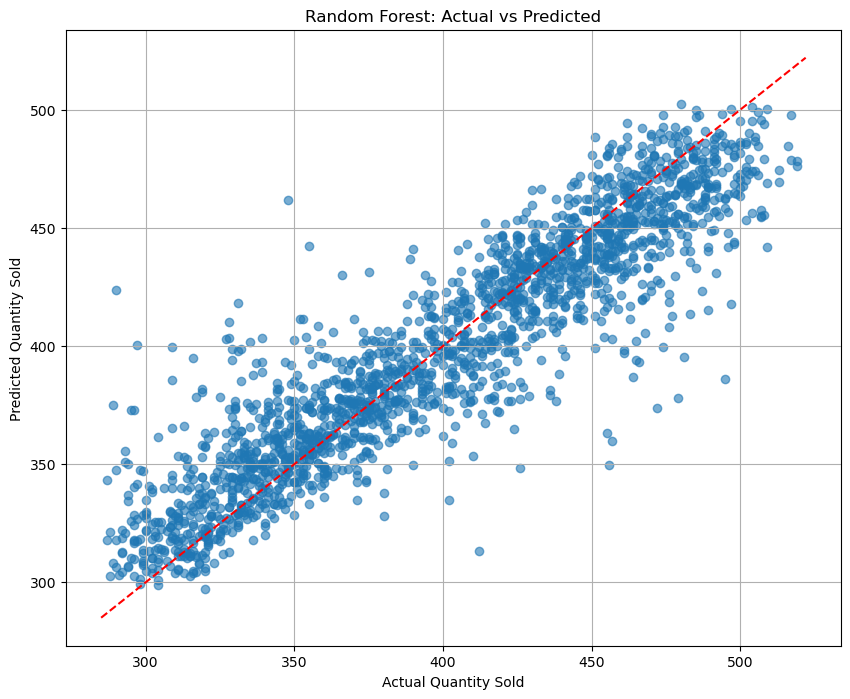

In [28]:
#visualise the prediction
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

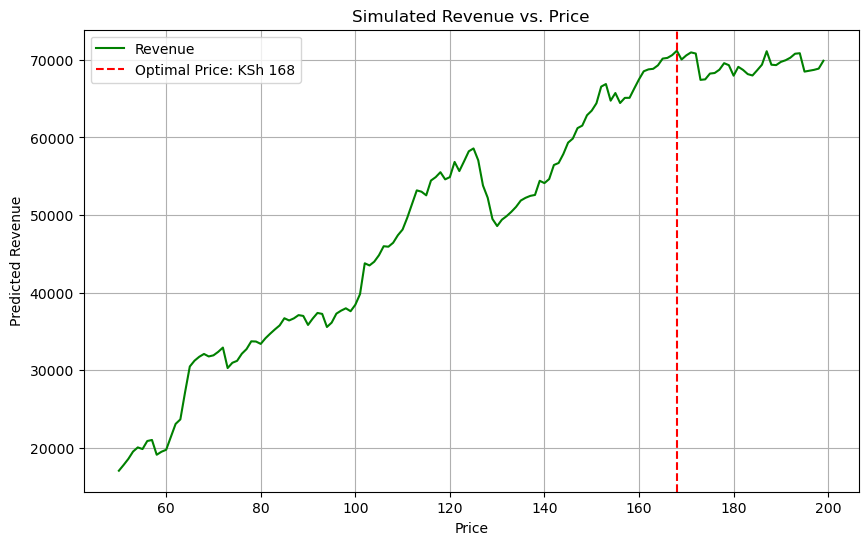

 Optimal Price: KSh 168
 Maximum Predicted Revenue: KSh 71,181.60


In [29]:

# Step 1: Simulate prices
price_range = np.arange(50, 200, 1)  # e.g., KSh 50 to KSh 199
comp_price = pricing_data['Competition_Price'].mean()  # Keep competition price constant

# Step 2: Create test data for prediction
simulation_data = pd.DataFrame({
    'Price': price_range,
    'Competition_Price': comp_price  # assume competition holds their price steady
})

# Step 3: Predict quantity for each price
predicted_quantity = rf_model.predict(simulation_data)

# Step 4: Calculate revenue
revenue = price_range * predicted_quantity

# Step 5: Find the optimal price
optimal_index = np.argmax(revenue)
optimal_price = price_range[optimal_index]
max_revenue = revenue[optimal_index]

# Step 6: Plot results
plt.figure(figsize=(10,6))
plt.plot(price_range, revenue, label='Revenue', color='green')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: KSh {optimal_price}')
plt.xlabel('Price')
plt.ylabel('Predicted Revenue')
plt.title('Simulated Revenue vs. Price')
plt.legend()
plt.grid(True)
plt.show()

# Display results
print(f" Optimal Price: KSh {optimal_price}")
print(f" Maximum Predicted Revenue: KSh {max_revenue:,.2f}")

### Key Insights

This analysis uncovered key pricing inefficiencies within our store compared to a competitor with a more defined pricing strategy. While our store exhibited a broad price distribution that led to inconsistent revenue performance, the competitor maintained a tighter pricing range between KSh 140–160, resulting in more stable and generally higher sales. Sales trends showed a typical inverse relationship between price and quantity sold. Our irregular pricing patterns contributed to revenue volatility, unlike the competitor whose consistent pricing likely enhanced customer trust and purchase behavior.

To address this, a Random Forest Regression model was used to predict sales amounts based on price, achieving a strong R² score of 0.84. A simulation across a price range of KSh 130–190 revealed that KSh 168 would yield the highest expected revenue—KSh 71,181.60, surpassing the current average. This price point balances market competitiveness and revenue potential. Assumptions included constant external conditions and equal sales quantity across stores for fair comparison. Implementing the recommended pricing strategy could drive improved financial performance and align our approach with market trends.


### Assumptions made throught the project;

##### Data Assumptions
- Each row in the dataset represents a unique and valid observation.
- Sales are influenced primarily by price and quantity, with other factors (like promotions or seasonality) not considered.
- Item quantity remains constant within a fiscal week for a given item and store.
- Competition_Price accurately reflects real competitive pricing in the market.
- Duplicate rows (if present) are either meaningful or do not impact analysis.


##### Analytical Assumptions
- There is a linear relationship between price and revenue in the regression model.
- Multicollinearity between variables (e.g., Price and Competition_Price) is not significant.
- Revenue is reliably calculated using `Price × Quantity`.
- Customer behavior is consistent across time and segments.



##### Modeling & Simulation Assumptions
- Price elasticity remains constant within each segment.
- Customers respond immediately to price changes with no delay.
- Market conditions remain stable throughout the analysis period.
- External factors like economic changes or competitor strategies are not affecting outcomes.
- Simulation results are assumed to be reflective of real-world behavior.
